## Lab 2: Principal Component Analysis
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

# Exercise 1
Use the  ```Dry_Bean_Dataset.xlsx``` available on the  ```github``` page of the labs.
- Divide your dataset into a train and a test set.
- Preprocess the data by centering the variables and dividing them by their standard deviation.

In [9]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")

In [10]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [11]:
y = df['Class']
X = df.drop('Class', axis=1)

In [12]:
y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [13]:
encoder = OrdinalEncoder()
y = np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))
print(y)  

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [15]:
X_mean = Xtrain.mean()
X_std = Xtrain.std()

In [16]:
Xtrain = (Xtrain - X_mean )/X_std

In [17]:
Xtrain.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
3562,3.904983,3.317666,3.286810,3.441291,0.425551,0.596263,3.877087,3.527785,1.544014,0.656532,-0.267833,-0.537720,-2.629723,-1.594027,-0.563707,-0.616905
11371,-0.781299,-1.008487,-0.963679,-0.891046,-0.484745,-0.224717,-0.781819,-0.964497,-0.093080,0.277861,0.922757,0.413521,1.155163,0.900645,0.380526,0.472128
7920,-0.421964,-0.485688,-0.450947,-0.394621,-0.235271,0.045681,-0.423509,-0.430377,0.072465,0.233962,0.549701,0.142053,0.313836,0.182273,0.103950,0.512790
3305,1.272850,1.466857,1.158660,1.617721,-0.228796,0.052155,1.273712,1.454539,0.429475,-0.328978,-0.736800,0.132820,-1.698430,-0.828074,0.094643,0.430540
7726,-0.469752,-0.468734,-0.308771,-0.690702,0.529563,0.666336,-0.469557,-0.497073,-0.687643,-0.012655,-0.112104,-0.616857,0.806559,-0.275759,-0.639120,-0.097276


- Write your own algorithm to perform PCA on the variables.

In [18]:
#Since the intent of these laboratories is for YOU to learn and test the algorithms, we will not provide a "hand-made" version of the algorithm in these solutions (as your code will be commented during the exam).
#We will use instead the sklearn version of PCA. You can check if your results match the provided solution.

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA() #this will keep all the components
#alternatively you can specify the number of components you want to keep by writing 
# pca = PCA(n_components =3)

In [21]:
pca.fit(Xtrain) #this is just a fit of the model to the training set

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


- Using the training set, obtain and plot the eigenvalue spectrum using the log-scale for the y-axis. What number of principal components would you select?

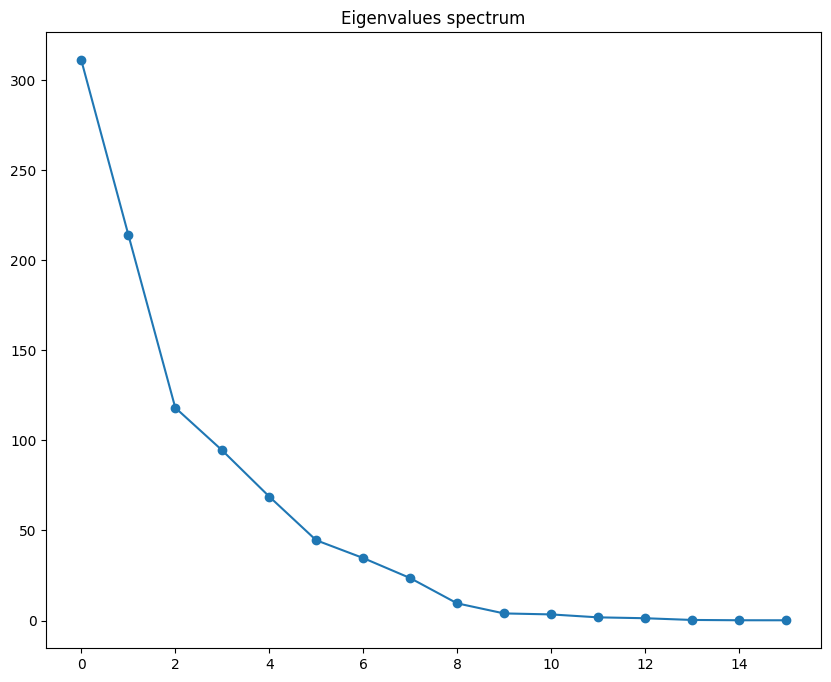

In [22]:
plt.figure(figsize=(10,8))
plt.plot(pca.singular_values_, "o-")
plt.title("Eigenvalues spectrum")
plt.show()

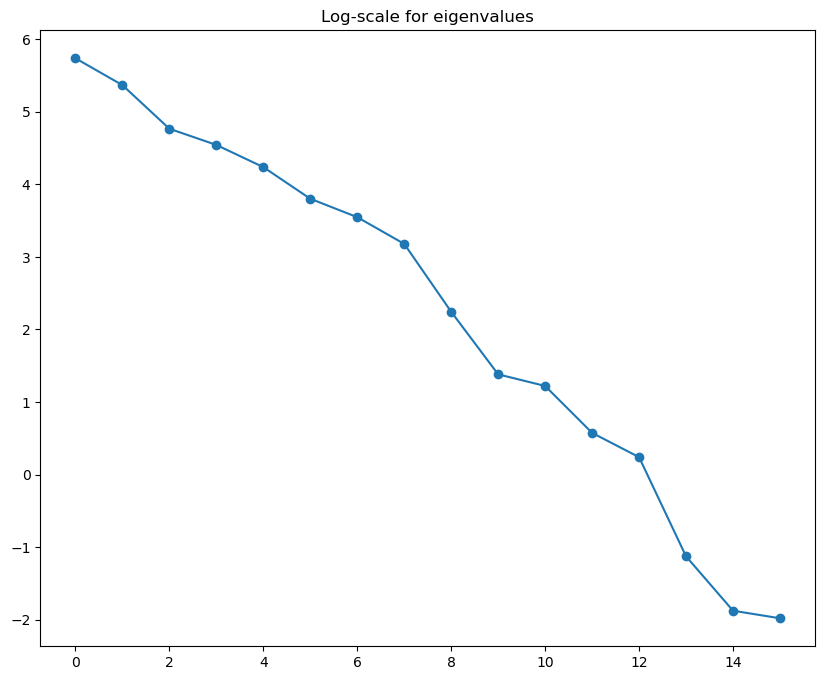

In [47]:
plt.figure(figsize=(10,8))
plt.plot(np.log(pca.singular_values_),"o-")
plt.title("Log-scale for eigenvalues")
plt.show()

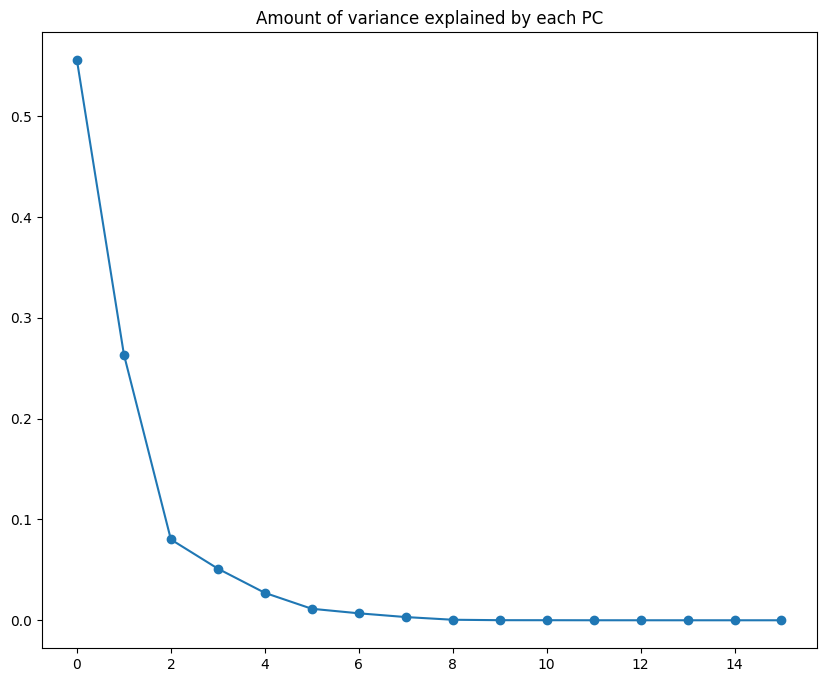

In [23]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_,"o-")
plt.title("Amount of variance explained by each PC")
plt.show()

- Project the data (training set) in the first two principal components and color by class. Do it also for three principal components. 

In [25]:
X_new = pca.transform(Xtrain)
print(X_new.shape)

#you can also fit the model and apply the dimensionality reduction to the same set by writing
#pca.fit_transform(Xtrain)

(10888, 16)


In [26]:
X_new_3 = X_new[:,:3] #we need at most 3 PCs

In [27]:
ytrain = np.array(ytrain)

In [28]:
data = np.column_stack((X_new_3, ytrain))
print(data.shape)

(10888, 4)


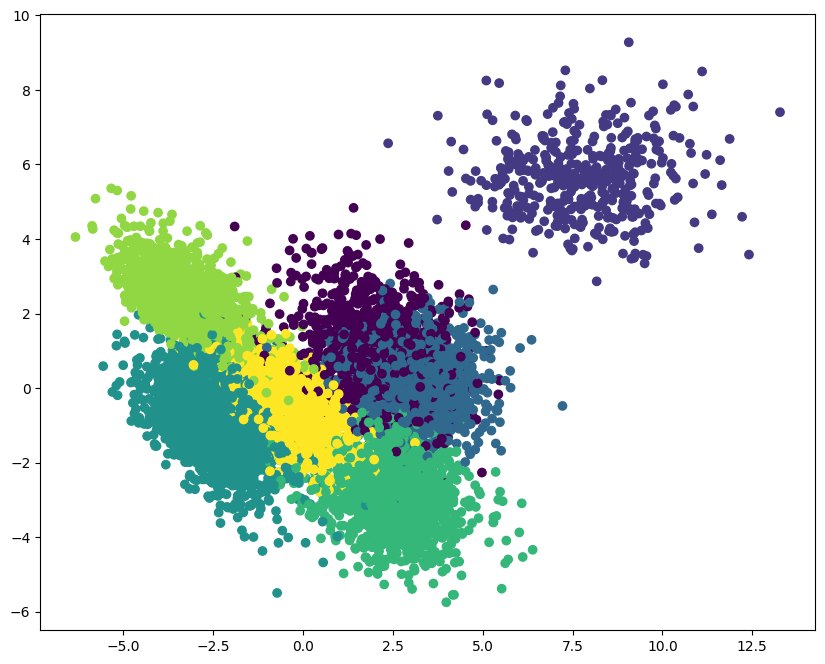

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=data[:,3])
plt.show()

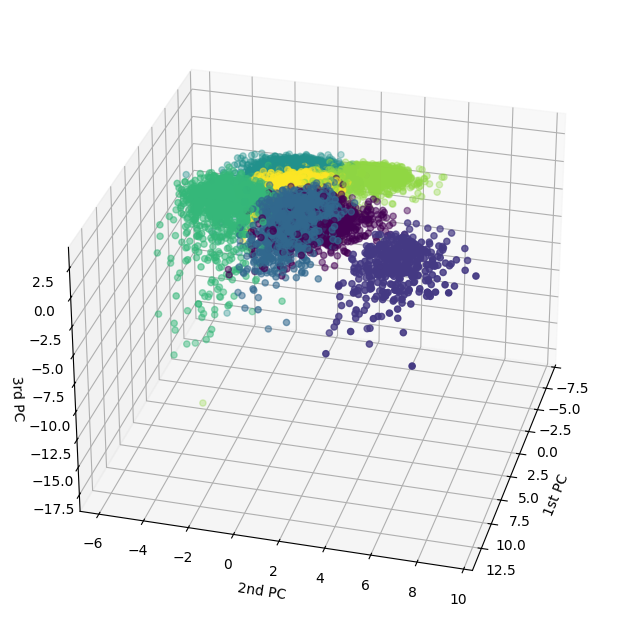

In [31]:
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,3])
axes.view_init(30,15)
axes.set_xlabel('1st PC')
axes.set_ylabel('2nd PC')
axes.set_zlabel('3rd PC')
plt.show()

- For an increasing number of principal components (1 to 16):
- - Apply a multinomial logistic regression to learn a model on the training set (use  ```sklearn.linear_model.LogisticRegression``` ).
- - Transform the test set with the matrix learned from the traning set. Make a prediction with the logistic model learned. 
- - Assess the quality of the predictions and comment on the results. 

In [32]:
Xtest = (Xtest- Xtest.mean())/Xtest.std() #proprocessing of the test set

In [33]:
score = []
for i in range(X_new.shape[1]): #X_new is the PCA transformation of the test set with all components kepts
    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
    lr.fit(X_new[:,:i+1], ytrain.ravel())

    x_PC = pca.transform(Xtest)
    x_PC = x_PC[:,:i+1] #keep only the needed PCs
    
    yhat = lr.predict(x_PC)
    print(i, ": ", lr.score(x_PC, ytest.ravel()))
    score.append(lr.score(x_PC, ytest.ravel()))

/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0 :  0.6338597135512303


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


1 :  0.8707308116048476


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


2 :  0.8718325376423063


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


3 :  0.8883584282041865


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


4 :  0.919573999265516


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


5 :  0.9203084832904884


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


6 :  0.9221446933529196


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


7 :  0.9221446933529196


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


8 :  0.9221446933529196


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


9 :  0.9225119353654058


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


10 :  0.9221446933529196


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


11 :  0.9217774513404333


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


12 :  0.9217774513404333


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


13 :  0.9221446933529196


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


14 :  0.9217774513404333


/home/francesco/py_envs/nope/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


15 :  0.9221446933529196


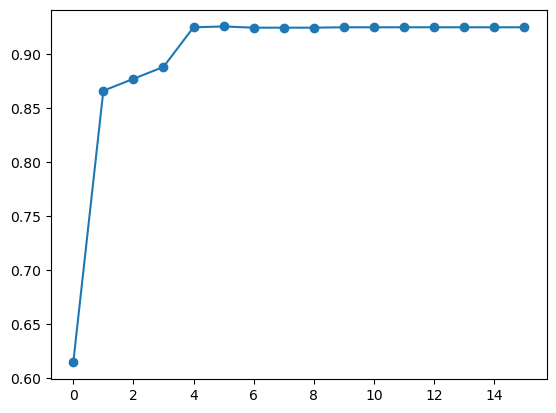

In [57]:
plt.plot(score, "o-")
plt.show()

In [34]:
print(f"The maximum values of the accuracy score is reached with {np.argmax(score)} PCs and it is equal to {np.max(score)}")

The maximum values of the accuracy score is reached with 9 PCs and it is equal to 0.9225119353654058


# Exercise 2
Try to apply PCA to the Swiss Roll dataset ($n=1000$) from Lab 1 and plot the projection on the first two principal components. Choose an appropriate color scheme for visualization and comment on your results. 

In [35]:
def swiss_roll(n): #from lab 1
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
               
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate
    return data

In [36]:
X = swiss_roll(1000)

In [37]:
#X = (X-np.mean(X)) #or 
X = (X-np.mean(X))/np.std(X) #but it is only necessary to centralize the data in practice

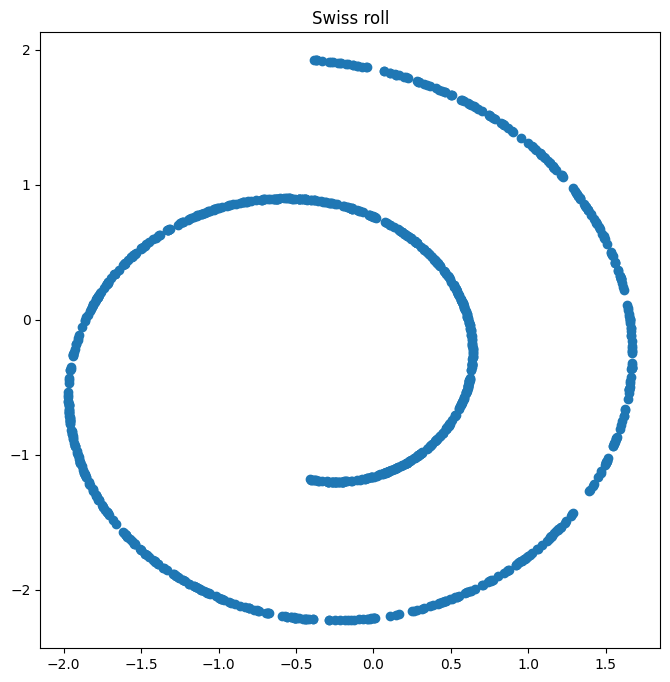

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.title("Swiss roll")
plt.show()

In [39]:
pca_swiss = PCA(n_components=2)
X_transformed = pca_swiss.fit_transform(X)

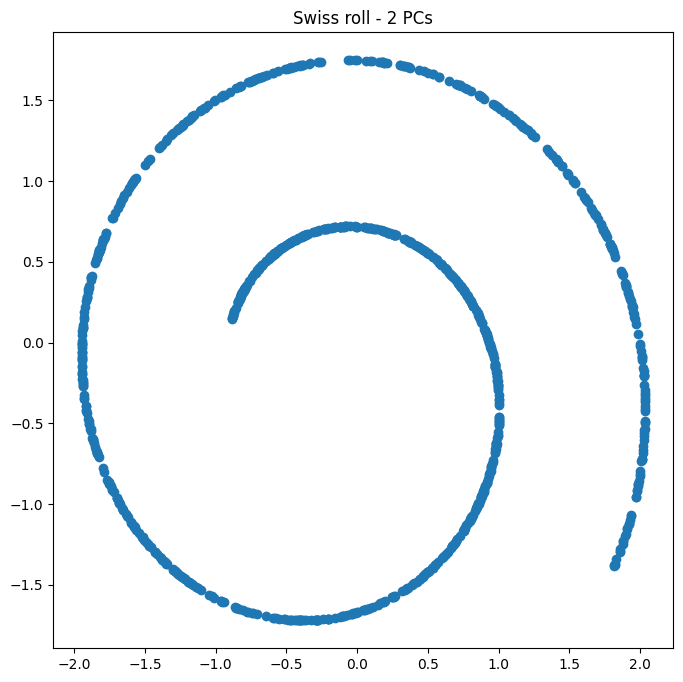

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.title("Swiss roll - 2 PCs")
plt.show()